## Version 1

### 3 Convolutions / leaky_relu / 0.2 Dropouts / 20 epochs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from sklearn.metrics import confusion_matrix

In [3]:
train_path = 'Kaggle_MRI_Tumor/Training'
test_path = 'Kaggle_MRI_Tumor/Testing'

classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

train_dataset = image_dataset_from_directory(directory=train_path,
                                             label_mode='categorical',
                                             class_names=classes)
test_dataset = image_dataset_from_directory(directory=test_path,
                                            label_mode='categorical',
                                            class_names=classes)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [4]:
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [5]:
model = tf.keras.models.Sequential()

# Preprocessing 
model.add(layers.Resizing(height=128, width=128, interpolation='bilinear'))
model.add(layers.Rescaling(scale=1./255))

In [6]:
# Data Augmentation
model.add(layers.RandomFlip(mode='horizontal_and_vertical'))
model.add(layers.RandomRotation(factor=.2))

In [7]:
# First Convolution
model.add(layers.Conv2D(filters=64, kernel_size=(1,5)))
model.add(layers.Conv2D(filters=64, kernel_size=(5,1)))
model.add(layers.Activation('leaky_relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(.2))


In [8]:
# Second Convolution
model.add(layers.Conv2D(filters=64, kernel_size=(1,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,1)))
model.add(layers.Activation('leaky_relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(.2))

In [9]:
# Third Convolution
model.add(layers.Conv2D(filters=64, kernel_size=(1,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,1)))
model.add(layers.Activation('leaky_relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(.2))

In [10]:
# Feed forward
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('leaky_relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(512))
model.add(layers.Activation('leaky_relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

In [11]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
90/90 [==============================] - 223s 2s/step - loss: 7.8775 - accuracy: 0.4638 - val_loss: 8.5427 - val_accuracy: 0.1878
Epoch 2/20
90/90 [==============================] - 310s 3s/step - loss: 2.5546 - accuracy: 0.4847 - val_loss: 3.4758 - val_accuracy: 0.2690
Epoch 3/20
90/90 [==============================] - 241s 3s/step - loss: 1.8023 - accuracy: 0.5328 - val_loss: 7.1722 - val_accuracy: 0.2386
Epoch 4/20
90/90 [==============================] - 266s 3s/step - loss: 1.4897 - accuracy: 0.5596 - val_loss: 3.3525 - val_accuracy: 0.2893
Epoch 5/20
90/90 [==============================] - 257s 3s/step - loss: 1.1708 - accuracy: 0.6164 - val_loss: 3.1312 - val_accuracy: 0.3782
Epoch 6/20
90/90 [==============================] - 265s 3s/step - loss: 1.0605 - accuracy: 0.6366 - val_loss: 5.1019 - val_accuracy: 0.2944
Epoch 7/20
90/90 [==============================] - 298s 3s/step - loss: 0.9096 - accuracy: 0.6854 - val_loss: 2.4976 - val_accuracy: 0.3274
Epoch 8/20
90

In [13]:
model.evaluate(test_dataset)

13/13 [==============================] - 7s 370ms/step - loss: 4.2531 - accuracy: 0.4619


[4.253051280975342, 0.46192893385887146]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 128, 124, 64)      1024      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      20544     
                                                        

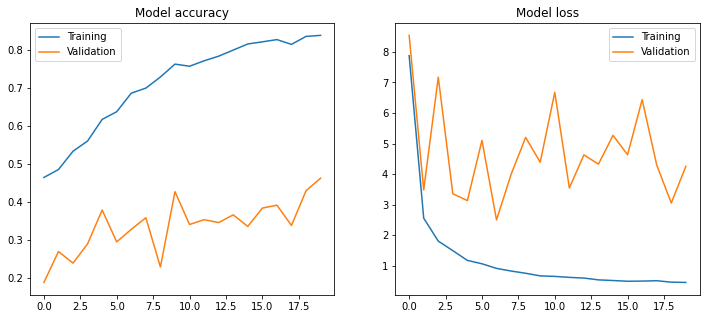

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(122)

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Model accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Model loss')

plt.show()

In [16]:
true_labels = []
predicted_labels = []

for x, y in test_dataset:
    true_labels.append(y)
    predicted_labels.append(model.predict(x))
    
true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

1/1 [==============================] - 1s 521ms/step


In [17]:
true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')

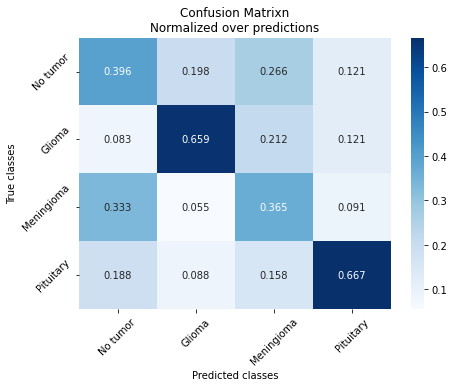

In [18]:
labels = ['No tumor', 'Glioma', 'Meningioma', 'Pituitary']

plt.figure(figsize=(7,5))

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3f')

plt.ylabel('True classes')
yticks, _ = plt.yticks()
plt.yticks(ticks=yticks, labels=labels, rotation=45)

plt.xlabel('Predicted classes')
xticks, _ = plt.xticks()
plt.xticks(ticks=xticks, labels=labels, rotation=45)

plt.title('Confusion Matrixn\nNormalized over predictions')


plt.show()